## KNN on glass data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
glass = pd.read_csv('glass.csv')
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [3]:
glass.tail()

RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7

### EDA

In [4]:
glass.shape

(214, 10)

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [7]:
glass.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [8]:
glass .isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [10]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [11]:
glass['Type'].value_counts().sort_index(ascending=True)

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [12]:
glass[glass.duplicated()]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [13]:
glass_df = glass.drop_duplicates()
glass_df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[213 rows x 10 columns]

In [14]:
corr = glass_df.corr()
corr

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.198802 -0.127526 -0.400973 -0.539000 -0.287645  0.811183   
Na   -0.198802  1.000000 -0.278420  0.167735 -0.064885 -0.264158 -0.278194   
Mg   -0.127526 -0.278420  1.000000 -0.479575 -0.162437  0.007617 -0.446197   
Al   -0.400973  0.167735 -0.479575  1.000000 -0.016195  0.323683 -0.258068   
Si   -0.539000 -0.064885 -0.162437 -0.016195  1.000000 -0.197281 -0.207145   
K    -0.287645 -0.264158  0.007617  0.323683 -0.197281  1.000000 -0.317032   
Ca    0.811183 -0.278194 -0.446197 -0.258068 -0.207145 -0.317032  1.000000   
Ba    0.001679  0.329080 -0.491818  0.480642 -0.104389 -0.043653 -0.112208   
Fe    0.147083 -0.239374  0.085426 -0.080583 -0.097717 -0.009372  0.126314   
Type -0.160140  0.508837 -0.744195  0.597432  0.147725 -0.012455  0.002677   

            Ba        Fe      Type  
RI    0.001679  0.147083 -0.160140  
Na    0.329080 -0.239374  0.508837  
Mg   -0.491818  0.085426 -0.744195  
Al    0.480642 -0.080583  0.597432  
Si   -0.104389 -0.097717  0.147725  
K    -0.043653 -0.009372 -0.012455  
Ca   -0.112208  0.126314  0.002677  
Ba    1.000000 -0.059729  0.574896  
Fe   -0.059729  1.000000 -0.191090  
Type  0.574896 -0.191090  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 576x576 with 0 Axes>

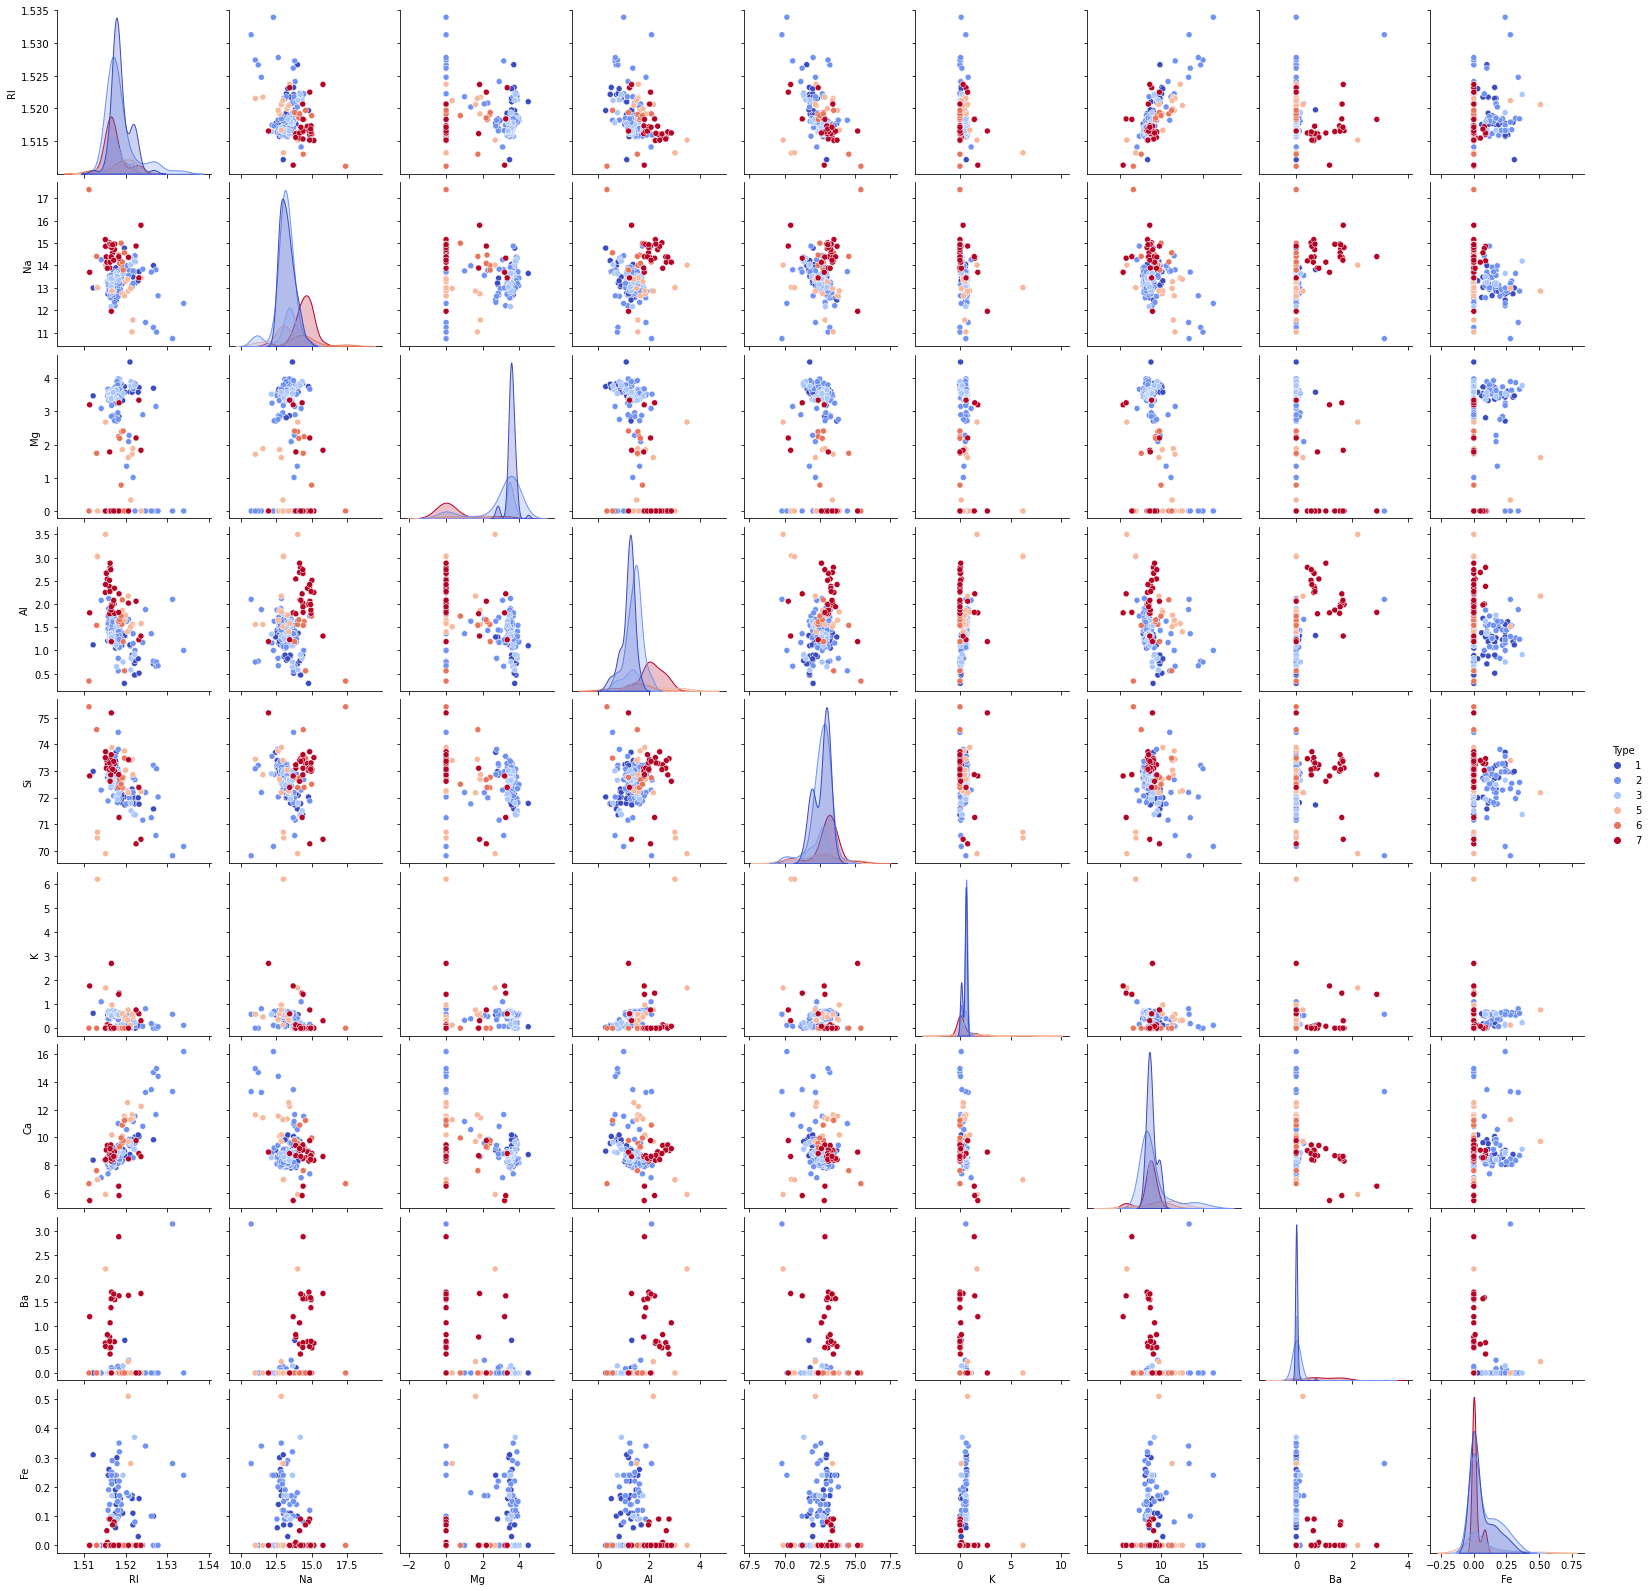

In [15]:
plt.figure(figsize=(8,8))
sns.pairplot(glass,hue = 'Type', palette = 'coolwarm')
plt.show

<AxesSubplot:>

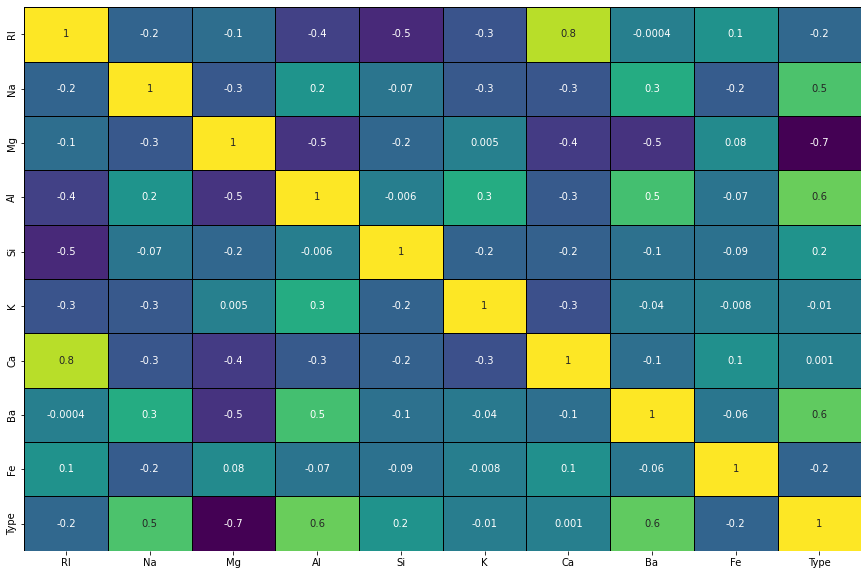

In [16]:
#Correlation matrics

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(glass.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

In [17]:
#we can notice that Ca and K values don,t affect Type that much
#Also Caa and RI are highly correlated, this means using only RI is enough
#So we can go ahead and drop Ca and also aaak

<AxesSubplot:xlabel='RI', ylabel='Na'>

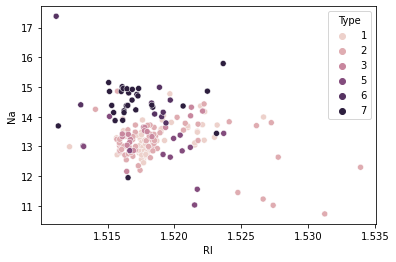

In [18]:
#Scatter plot for two features
sns.scatterplot(glass_df['RI'],glass_df['Na'],hue=glass_df['Type'])

In [19]:
x = glass_df.drop('Type',axis=1)
y = glass_df[['Type']]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [21]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)

Shape of X_train:  (149, 9)
Shape of X_test:  (64, 9)
Shape of y_train:  (149, 1)


In [24]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Grid search

In [25]:
#for chosing best K value

In [26]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors = n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [29]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [30]:
print(grid.best_score_)
print(grid.best_params_)

0.6339826839826839
{'n_neighbors': 3}


In [31]:
#CV results

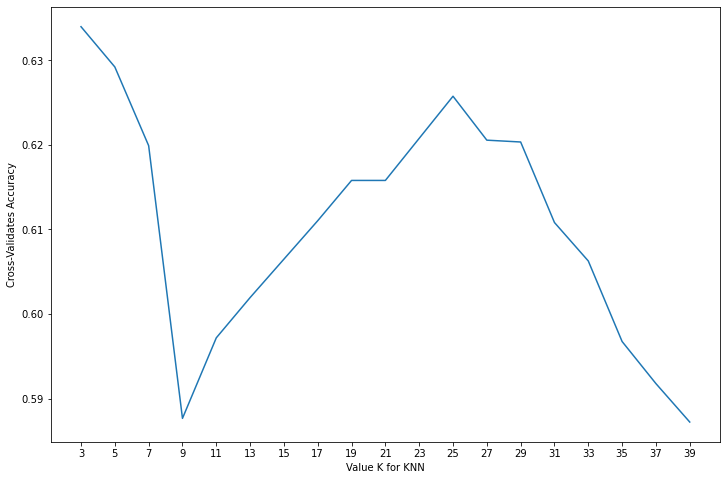

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
#choose k between 1 to 40
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []
#use iteration to calculator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x,y, cv=10)
    k_scores.append(scores.mean())
#plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value K for KNN')
plt.ylabel("Cross-Validates Accuracy")
plt.xticks(k_range)
plt.show()

In [34]:
glass_df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[213 rows x 10 columns]

In [35]:
glass_df1 = glass_df.iloc[:,0:9]
glass_df1

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[213 rows x 9 columns]

In [36]:
array = glass_df1.values
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [37]:
#Normalization function
from sklearn.preprocessing import StandardScaler

stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [38]:
X

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [39]:
#Removing last columns
glass_df_knn = pd.DataFrame(X, columns=glass_df.columns[:-1])
glass_df_knn

RI        Na        Mg        Al        Si         K        Ca  \
0    0.879840  0.289558  1.257238 -0.706370 -1.133248 -0.673480 -0.143466   
1   -0.243816  0.596403  0.639311 -0.180863  0.097037 -0.028962 -0.790201   
2   -0.716412  0.154546  0.604596  0.182950  0.433746 -0.167073 -0.825349   
3   -0.227291 -0.238216  0.701798 -0.322346 -0.058368  0.109149 -0.516041   
4   -0.306608 -0.164573  0.653197 -0.423405  0.550299  0.078457 -0.621487   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.699888  0.903249 -1.860172  2.891336 -0.058368 -0.642789  0.158812   
209 -0.494986  1.860605 -1.860172  1.092483  0.524398 -0.765554 -0.389506   
210  0.760865  1.173272 -1.860172  1.153118  0.990612 -0.765554 -0.361387   
211 -0.607351  1.197820 -1.860172  0.991424  1.236668 -0.765554 -0.333268   
212 -0.409059  1.013713 -1.860172  1.274389  0.912909 -0.765554 -0.234852   

           Ba        Fe  
0   -0.353808 -0.588301  
1   -0.353808 -0.588301  
2   -0.353808 -0.588301  
3   -0.353808 -0.588301  
4   -0.353808 -0.588301  
..        ...       ...  
208  1.778672 -0.588301  
209  2.844912 -0.588301  
210  2.945501 -0.588301  
211  2.804676 -0.588301  
212  3.005854 -0.588301  

[213 rows x 9 columns]

In [40]:
x = glass_df_knn
y = glass_df['Type']

In [41]:
x

RI        Na        Mg        Al        Si         K        Ca  \
0    0.879840  0.289558  1.257238 -0.706370 -1.133248 -0.673480 -0.143466   
1   -0.243816  0.596403  0.639311 -0.180863  0.097037 -0.028962 -0.790201   
2   -0.716412  0.154546  0.604596  0.182950  0.433746 -0.167073 -0.825349   
3   -0.227291 -0.238216  0.701798 -0.322346 -0.058368  0.109149 -0.516041   
4   -0.306608 -0.164573  0.653197 -0.423405  0.550299  0.078457 -0.621487   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.699888  0.903249 -1.860172  2.891336 -0.058368 -0.642789  0.158812   
209 -0.494986  1.860605 -1.860172  1.092483  0.524398 -0.765554 -0.389506   
210  0.760865  1.173272 -1.860172  1.153118  0.990612 -0.765554 -0.361387   
211 -0.607351  1.197820 -1.860172  0.991424  1.236668 -0.765554 -0.333268   
212 -0.409059  1.013713 -1.860172  1.274389  0.912909 -0.765554 -0.234852   

           Ba        Fe  
0   -0.353808 -0.588301  
1   -0.353808 -0.588301  
2   -0.353808 -0.588301  
3   -0.353808 -0.588301  
4   -0.353808 -0.588301  
..        ...       ...  
208  1.778672 -0.588301  
209  2.844912 -0.588301  
210  2.945501 -0.588301  
211  2.804676 -0.588301  
212  3.005854 -0.588301  

[213 rows x 9 columns]

In [42]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = True)

In [44]:
x_train

RI        Na        Mg        Al        Si         K        Ca  \
14  -0.237206 -0.974644  0.632368 -0.281922  0.822257  0.124494 -0.319209   
186  1.587082  0.044082  0.458793 -0.443617 -0.356226  0.155186 -0.087228   
174  0.939328 -0.532787 -1.631052  0.122315  0.951760 -0.566060  1.628025   
56  -0.035609 -0.655525  0.555995 -0.322346  0.381944  0.155186 -0.368417   
183 -2.378762  4.879962 -1.860172 -2.242470  3.567734 -0.765554 -1.619708   
..        ...       ...       ...       ...       ...       ...       ...   
203 -0.719717  1.897427 -1.860172  1.658414  0.835207 -0.765554 -0.171585   
137 -0.531339 -0.753716  0.583767  0.182950  0.912909  0.247260 -0.740993   
72  -0.673449 -0.078656  0.618482  0.243586  0.278342  0.170531 -0.748022   
140  0.053623 -0.250489  0.660140 -0.767006  0.226540  0.109149 -0.382476   
37  -0.124840 -0.815085  0.555995 -0.201075  0.394895  0.216568 -0.192674   

           Ba        Fe  
14  -0.353808 -0.588301  
186 -0.353808 -0.588301  
174 -0.353808  2.287623  
56  -0.353808 -0.588301  
183 -0.353808 -0.588301  
..        ...       ...  
203  0.994080 -0.588301  
137 -0.353808 -0.588301  
72  -0.353808 -0.588301  
140 -0.172748  1.157796  
37  -0.353808 -0.588301  

[149 rows x 9 columns]

In [45]:
x_test

RI        Na        Mg        Al        Si         K        Ca  \
108 -0.055438  0.387749 -1.860172 -1.797810  2.324499 -0.765554  1.431193   
191 -0.699888  0.976891 -1.860172  2.709430  1.042413 -0.704171  0.060396   
106  5.149732 -1.355132 -1.860172 -0.908489 -3.231207 -0.581406  5.086650   
107  1.279729  1.259189 -1.860172 -0.908489  0.019334 -0.612097  1.803768   
51  -0.088487  0.031808  0.132471 -0.524464  0.239491  0.078457  0.053367   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.699888  0.903249 -1.860172  2.891336 -0.058368 -0.642789  0.158812   
114  0.037098  0.007261  0.840658 -0.241498 -0.356226  0.017075 -0.473863   
127  0.770779  0.179094 -0.409083  0.445704 -0.615233  0.047766  0.432972   
116 -0.418974  0.387749  0.694855  0.728670 -0.770638  0.216568 -0.755052   
117 -0.534644 -0.127751  0.667083  0.162738 -0.161971  0.231914 -0.649606   

           Ba        Fe  
108 -0.353808 -0.588301  
191  0.450902  0.336103  
106 -0.353808  1.876777  
107 -0.353808  0.233392  
51  -0.353808 -0.588301  
..        ...       ...  
208  1.778672 -0.588301  
114 -0.353808 -0.588301  
127  0.189371  1.157796  
116 -0.353808 -0.588301  
117 -0.353808  2.390335  

[64 rows x 9 columns]

In [47]:
y_train

14     1
187    7
175    5
57     1
184    6
      ..
204    7
138    2
73     2
141    2
37     1
Name: Type, Length: 149, dtype: int64

In [48]:
y_test

109    2
192    7
107    2
108    2
52     1
      ..
209    7
115    2
128    2
117    2
118    2
Name: Type, Length: 64, dtype: int64

### KNN Model

In [49]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
#predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    28
2    21
7     7
6     3
3     3
5     2
dtype: int64

In [51]:
pd.crosstab(y_test,preds)

col_0   1   2  3  5  6  7
Type                     
1      20   1  2  0  0  0
2       3  18  0  0  1  0
3       5   1  1  0  0  0
5       0   0  0  2  0  0
6       0   0  0  0  2  0
7       0   1  0  0  0  7

In [52]:
print('Accuracy', accuracy_score(y_test,preds)*100)

Accuracy 78.125


In [53]:
model.score(x_train,y_train)

0.7986577181208053

In [54]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.71      0.87      0.78        23
           2       0.86      0.82      0.84        22
           3       0.33      0.14      0.20         7
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      0.88      0.93         8

    accuracy                           0.78        64
   macro avg       0.76      0.78      0.76        64
weighted avg       0.76      0.78      0.76        64



### Grid search for Algorithm tuning

In [55]:
n_neighbors = np.array(range(1,20))
param_grid = dict(n_neighbors=n_neighbors)

In [56]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [57]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666667
{'n_neighbors': 2}


In [58]:
#Visualizing cv results

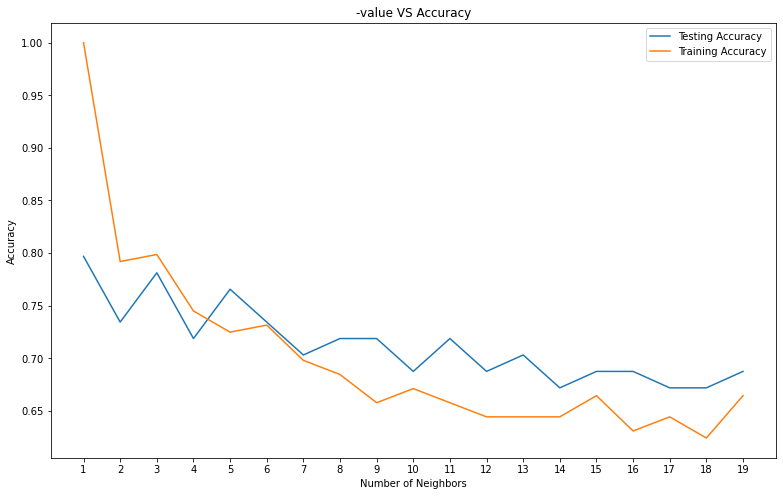

Best accuracy is 0.796875 with K = 1


In [59]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 20(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))